**Major Project Phase 2 Review II**

**Team 58**

**Project Title :→** *Identification of Images using **CBIR** with **Keras**.*

**Steps for image classification on CIFAR-10**

*1. Load the dataset from keras datasets module*

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


*2. Plot some images from the dataset to visualize the dataset*

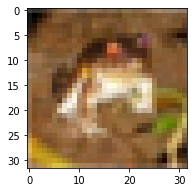

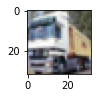

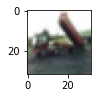

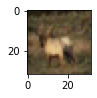

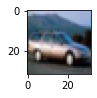

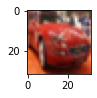

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.show()

*3. Import the required layers and modules to create our convolution neural net architecture*

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

*4. Convert the pixel values of the dataset to float type and then normalize the dataset*

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

*5. Now perform the one-hot encoding for target classes*

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

*6. Create the sequential model and add the layers*

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

*7. Configure the optimizer and compile the model*

In [ ]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=Fals)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

*8. View the model summary for better understanding of model architecture*

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

*9. Train the model*

In [ ]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 223s 569ms/step - loss: 1.8257 - accuracy: 0.3449 - val_loss: 1.5085 - val_accuracy: 0.4659
Epoch 2/10
391/391 [==============================] - 223s 570ms/step - loss: 1.4833 - accuracy: 0.4680 - val_loss: 1.3636 - val_accuracy: 0.5096
Epoch 3/10
391/391 [==============================] - 217s 555ms/step - loss: 1.3544 - accuracy: 0.5154 - val_loss: 1.2641 - val_accuracy: 0.5423
Epoch 4/10
391/391 [==============================] - 221s 565ms/step - loss: 1.2610 - accuracy: 0.5491 - val_loss: 1.1888 - val_accuracy: 0.5781
Epoch 5/10
391/391 [==============================] - 222s 568ms/step - loss: 1.1751 - accuracy: 0.5822 - val_loss: 1.1447 - val_accuracy: 0.5962
Epoch 6/10
391/391 [==============================] - 220s 562ms/step - loss: 1.1031 - accuracy: 0.6065 - val_loss: 1.0923 - val_accuracy: 0.6103
Epoch 7/10
391/391 [==============================] - 228s 582ms/step - loss: 1.0361 - accuracy: 0.6336 - val_loss: 1.0453 -

*10. Calculate its accuracy on testing data*

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 10s 32ms/step - loss: 0.9745 - accuracy: 0.6530
65.2999997138977


*11. Save the model*

In [ ]:
model.save("model1_cifar_10epoch.h5")

In [ ]:
from google.colab import files
files.download('model1_cifar_10epoch.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*12. Make a dictionary to map to the output classes and make predictions from the mode*

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving pic5.jpeg to pic5.jpeg


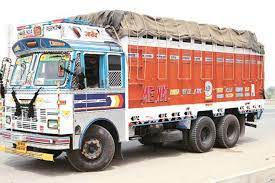

In [ ]:
Image("truck.jpeg")

In [ ]:
uploaded = files.upload()

Saving aeroplane.jpeg to aeroplane.jpeg


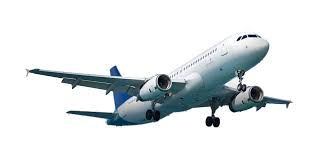

In [ ]:
Image("aeroplane.jpeg")

In [ ]:
uploaded = files.upload()

Saving pic3.jpeg to pic3 (1).jpeg


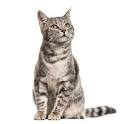

In [ ]:
Image("pic3 (1).jpeg")

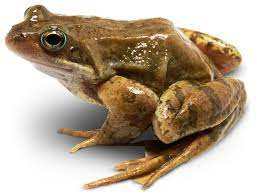

In [ ]:
Image("pic5.jpeg")

In [ ]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

In [ ]:
from keras import models
from numpy import array
from PIL import Image
import numpy as np
image=Image.open("pic5.jpeg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
image = image.resize((32,32))
image = np.expand_dims(image,axis=0)
image = np.array(image)
pred=np.argmax(model.predict([image])[0],axis=-1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(pred,results[pred])

9 truck


In [ ]:
print(pred,results[pred])

0 aeroplane


In [ ]:
print(pred,results[pred])

3 cat


In [ ]:
print(pred,results[pred])

6 frog
